## Exploring Decision Tree Algorithm
Here we will be seeing the use of Decision Tree as it is one of the fastest way to identify most significant variables and relation between two or more variables.

---
###  -----------------------------------------------------------DECISION TREE---------------------------------------------------------------
In this task, we will create the Decision Tree classifier and visualize it graphically for "iris" dataset.

### Importing necessary libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 15})

### Import necessary libraries for graphviz

In [3]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz, export
import pydotplus as pdot
import graphviz
from IPython.display import Image, display

### Loading the data

In [4]:
# Loading the iris dataset
df = pd.read_csv("D:\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df = df.drop('Id',axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
print(df.shape)

(150, 5)


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Preparing the data

In [8]:
# Dividing the data
feature_columns = df.columns.difference( ['Species'] )
feature_columns

Index(['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm'], dtype='object')

### Splitting the data

In [9]:
train_X, test_X, train_y, test_y = train_test_split( df[feature_columns],
                                                  df['Species'],
                                                  test_size = 0.2,                 # 20% data kept for testing
                                                  random_state = 123 )

In [10]:
print(len( train_X ))
print(len( test_X))

120
30


### Training the test dataset

In [11]:
dtree = DecisionTreeClassifier()
dtree.fit(train_X, train_y)

print("Decision Tree Classifier Created")

Decision Tree Classifier Created


### Predicting the Species for "train" dataset

In [12]:
tree_train_pred = pd.DataFrame({"actual":train_y, "predicted":dtree.predict(train_X)})
tree_train_pred.head(10)

,actual,predicted
130,Iris-virginica,Iris-virginica
119,Iris-virginica,Iris-virginica
29,Iris-setosa,Iris-setosa
0,Iris-setosa,Iris-setosa
62,Iris-versicolor,Iris-versicolor
93,Iris-versicolor,Iris-versicolor
131,Iris-virginica,Iris-virginica
5,Iris-setosa,Iris-setosa
16,Iris-setosa,Iris-setosa
82,Iris-versicolor,Iris-versicolor


### Predicting the Species for "test" dataset

In [13]:
tree_test_pred = pd.DataFrame({"actual":test_y, "predicted":dtree.predict(test_X)})
tree_test_pred.head(10)

,actual,predicted
72,Iris-versicolor,Iris-versicolor
112,Iris-virginica,Iris-virginica
132,Iris-virginica,Iris-virginica
88,Iris-versicolor,Iris-versicolor
37,Iris-setosa,Iris-setosa
138,Iris-virginica,Iris-versicolor
87,Iris-versicolor,Iris-versicolor
42,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
90,Iris-versicolor,Iris-versicolor


### Checking the Accuracy Score of predicted and actual values for train & test dataset

In [26]:
print("Accuracy:",metrics.accuracy_score(tree_train_pred.actual, tree_train_pred.predicted))

Accuracy: 1.0


In [27]:
print("Accuracy:",metrics.accuracy_score(tree_test_pred.actual, tree_test_pred.predicted))

Accuracy: 0.9666666666666667


### Classification Report

In [16]:
report = classification_report(tree_test_pred.actual, tree_test_pred.predicted)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.91      0.95        11

    avg / total       0.97      0.97      0.97        30



### Confusion Matrix

In [17]:
tree_cm = metrics.confusion_matrix(tree_test_pred.actual, tree_test_pred.predicted)
tree_cm

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]], dtype=int64)

Text(0.5,41.5,'Predicted Label')

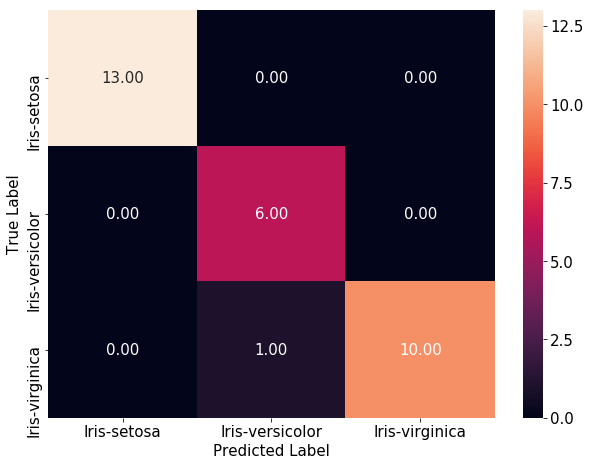

In [18]:
# Visualizing the confusion matrix in seaborn using heatmap

sns.heatmap(tree_cm, annot=True, fmt=".2f", xticklabels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"], 
           yticklabels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

### Visualizing the graph

In [24]:
# Export resulting tree to DOT source code string
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=feature_columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pdot.graphviz.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf('decision_tree.pdf')

True

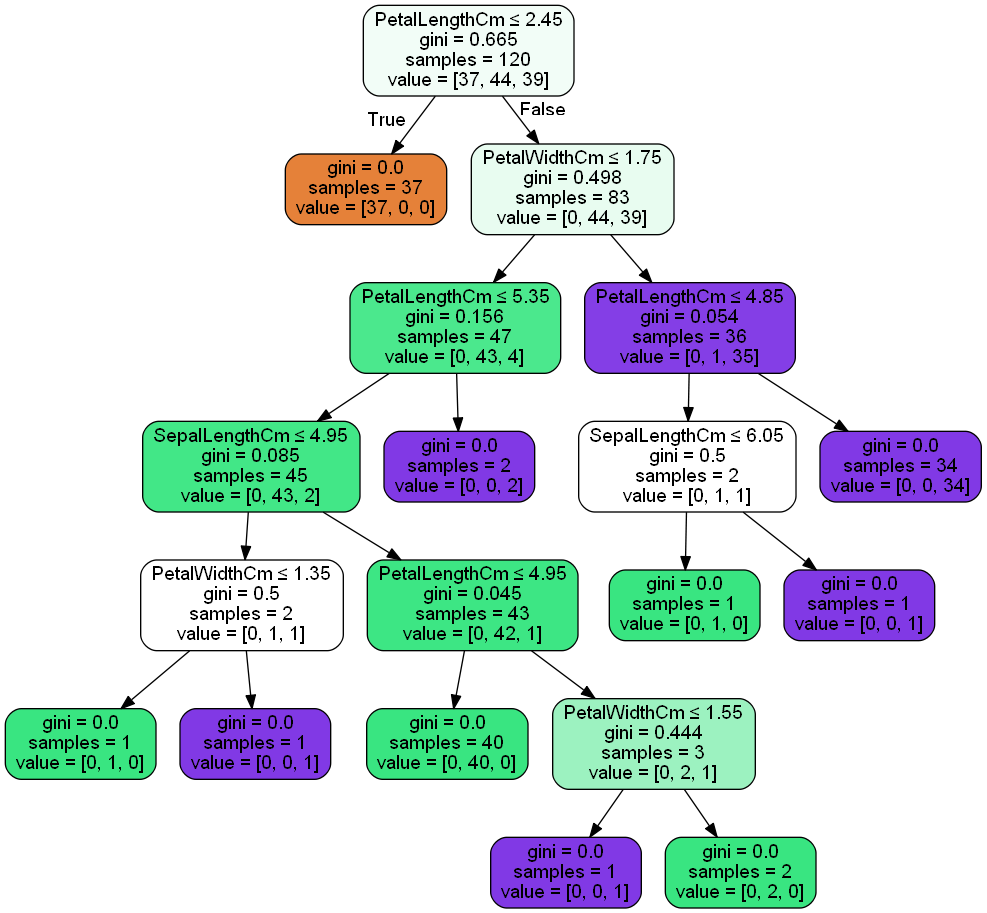

In [25]:
Image(graph.create_png())

### To know the importance of the features

In [28]:
list(zip(train_X.columns,dtree.feature_importances_))

[('PetalLengthCm', 0.5451697757274788),
 ('PetalWidthCm', 0.43140761491222224),
 ('SepalLengthCm', 0.023422609360299117),
 ('SepalWidthCm', 0.0)]

### New Input Data

In [40]:
#Input Vector 
X_new = np.array([[3, 2, 9, 0.2], [  4.7, 3, 1.3, 0.2 ]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (2, 4)


### Prediction of class for new data using "decision tree" created.

In [41]:
prediction = dtree.predict(X_new)

In [42]:
#Prediction of the species from the input vector
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-virginica' 'Iris-versicolor']
